In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv("train.csv")

In [15]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


# Bi-variate analysis

Let's compare the variables against our target

First I will compare the correlation of the continous variables with loan_default.

But loan_default is discrete. So, pearsons correlation won't work here.

We need to calculate point biserial correlation coefficient here.

The assumptions of point biserial are normal distribution of the continous variables.

So, we need to deal with that first before proceeding further

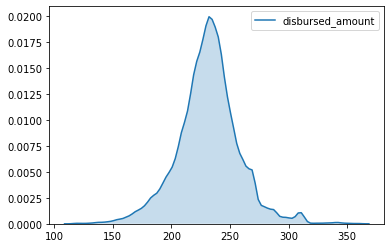

In [16]:
sns.kdeplot(np.sqrt(data[data['disbursed_amount']<131211]['disbursed_amount']),shade=True)

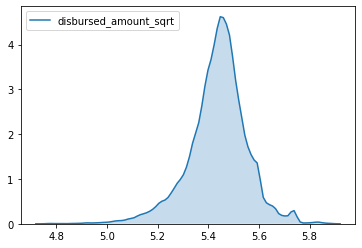

In [17]:
data = data[data['disbursed_amount']<131211]
data["disbursed_amount_sqrt"] = np.sqrt(data['disbursed_amount'])
sns.kdeplot(np.log(data['disbursed_amount_sqrt']),shade=True)

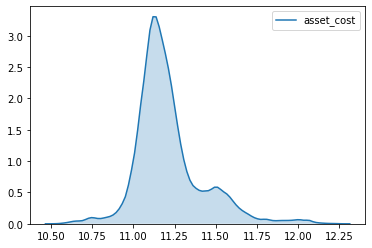

In [18]:
sns.kdeplot(np.log(data[data['asset_cost']<211430]['asset_cost']),shade=True)

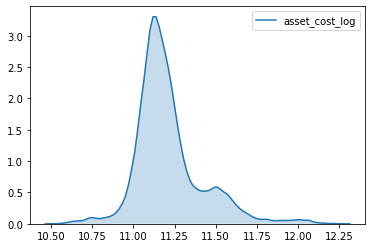

In [19]:
data = data[data['asset_cost']<211430]
data['asset_cost_log'] = np.log(data['asset_cost'])
sns.kdeplot(data['asset_cost_log'],shade=True)

(array([ 2103.,  3321.,  5774.,  9568., 14919., 24823., 45724., 52082.,
        49957., 21720.]),
 array([3.44849756, 3.55993807, 3.67137858, 3.78281908, 3.89425959,
        4.0057001 , 4.11714061, 4.22858111, 4.34002162, 4.45146213,
        4.56290264]),
 <a list of 10 Patch objects>)

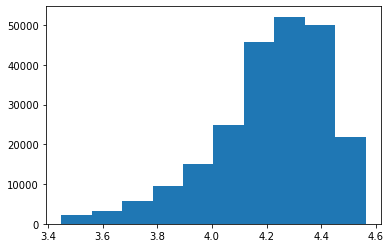

In [20]:
plt.hist(np.cbrt(data[data['ltv']>41]['ltv']))
#plt.hist(np.cbrt(data.ltv))

(array([ 2103.,  3321.,  5774.,  9568., 14919., 24823., 45724., 52082.,
        49957., 21720.]),
 array([3.44849756, 3.55993807, 3.67137858, 3.78281908, 3.89425959,
        4.0057001 , 4.11714061, 4.22858111, 4.34002162, 4.45146213,
        4.56290264]),
 <a list of 10 Patch objects>)

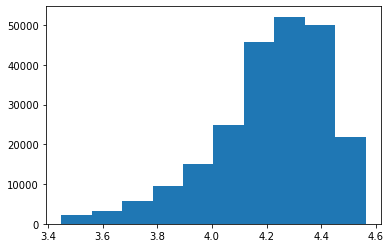

In [21]:
data = data[data['ltv']>41]
data["ltv_cbrt"] = np.cbrt(data['ltv'])
plt.hist(data['ltv_cbrt'])

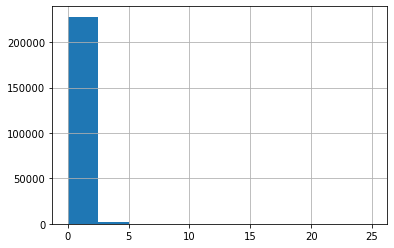

In [22]:
data['PRI.OVERDUE.ACCTS'].hist()

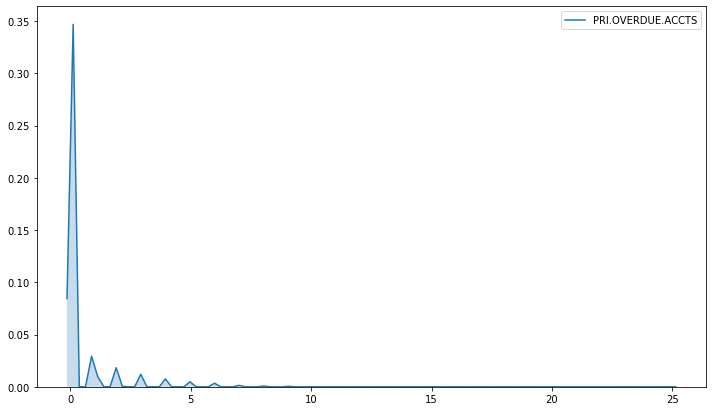

In [23]:
plt.figure(figsize=(12,7))
sns.kdeplot(data['PRI.OVERDUE.ACCTS'],shade=True)

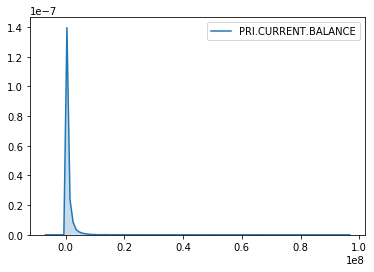

In [24]:
sns.kdeplot(data['PRI.CURRENT.BALANCE'],shade=True)

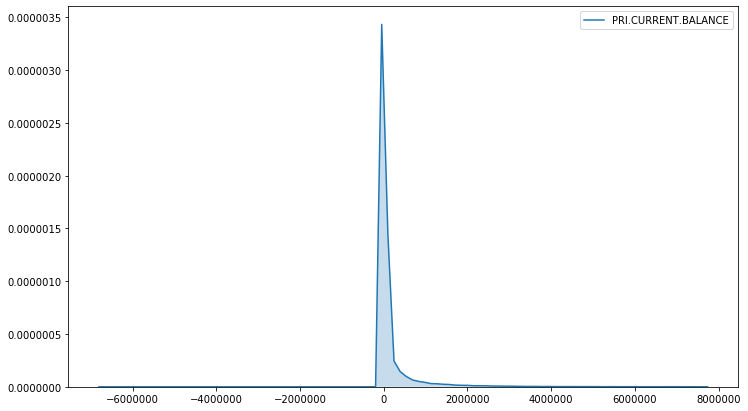

In [25]:
plt.figure(figsize=(12,7))
sns.kdeplot((data[data['PRI.CURRENT.BALANCE']<7621380]['PRI.CURRENT.BALANCE']),shade=True)

dropping this

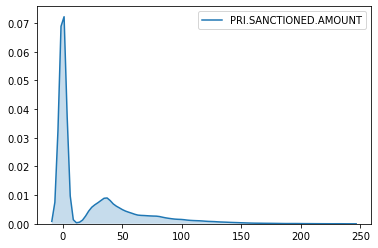

In [26]:
sns.kdeplot(np.cbrt(data[data['PRI.SANCTIONED.AMOUNT']<13378903]['PRI.SANCTIONED.AMOUNT']),shade=True)

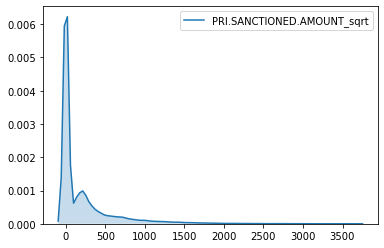

In [27]:
data = data[data['PRI.SANCTIONED.AMOUNT']<13378903]
data['PRI.SANCTIONED.AMOUNT_sqrt'] = np.sqrt(data['PRI.SANCTIONED.AMOUNT'])
sns.kdeplot(data['PRI.SANCTIONED.AMOUNT_sqrt'],shade=True)

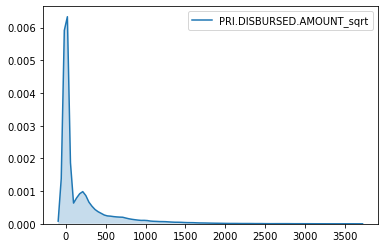

In [28]:
data = data[data['PRI.DISBURSED.AMOUNT']<13197632]
data['PRI.DISBURSED.AMOUNT_sqrt'] = np.sqrt(data['PRI.DISBURSED.AMOUNT'])
sns.kdeplot(data['PRI.DISBURSED.AMOUNT_sqrt'],shade=True)

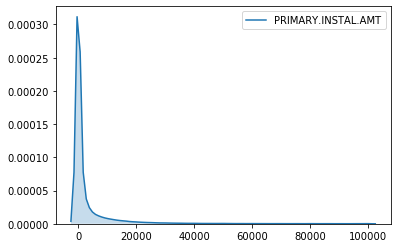

In [29]:
sns.kdeplot(data[data['PRIMARY.INSTAL.AMT']<=100000]['PRIMARY.INSTAL.AMT'],shade=True)

In [30]:
#To calculate correlation between categorical and continous data
from scipy.stats import pointbiserialr

In [33]:
#continous = ['disbursed_amount','asset_cost','ltv','PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','NO.OF_INQUIRIES']
continous = ['disbursed_amount_sqrt','asset_cost_log','ltv_cbrt','PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','NO.OF_INQUIRIES']

pbcs = {}
for x in continous:
    pbc = pointbiserialr(data['loan_default'],data[x])
    pbcs[x] = pbc[0]

pbcs

{'disbursed_amount_sqrt': 0.08369319314525708,
 'asset_cost_log': 0.018532585100804886,
 'ltv_cbrt': 0.0970971053779084,
 'PRI.OVERDUE.ACCTS': 0.04121300322735202,
 'PRI.CURRENT.BALANCE': -0.03667762919977559,
 'PRI.SANCTIONED.AMOUNT': -0.043197784555973825,
 'PRI.DISBURSED.AMOUNT': -0.04267073105292514,
 'SEC.OVERDUE.ACCTS': -0.001479195588905918,
 'SEC.CURRENT.BALANCE': -0.005637943516330304,
 'SEC.SANCTIONED.AMOUNT': -0.006508055277891309,
 'SEC.DISBURSED.AMOUNT': -0.006397909109357451,
 'PRIMARY.INSTAL.AMT': -0.010894796051135691,
 'SEC.INSTAL.AMT': -0.001467975723671076,
 'NEW.ACCTS.IN.LAST.SIX.MONTHS': -0.029390584584463975,
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS': 0.03556554647190219,
 'NO.OF_INQUIRIES': 0.0434671226183567}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

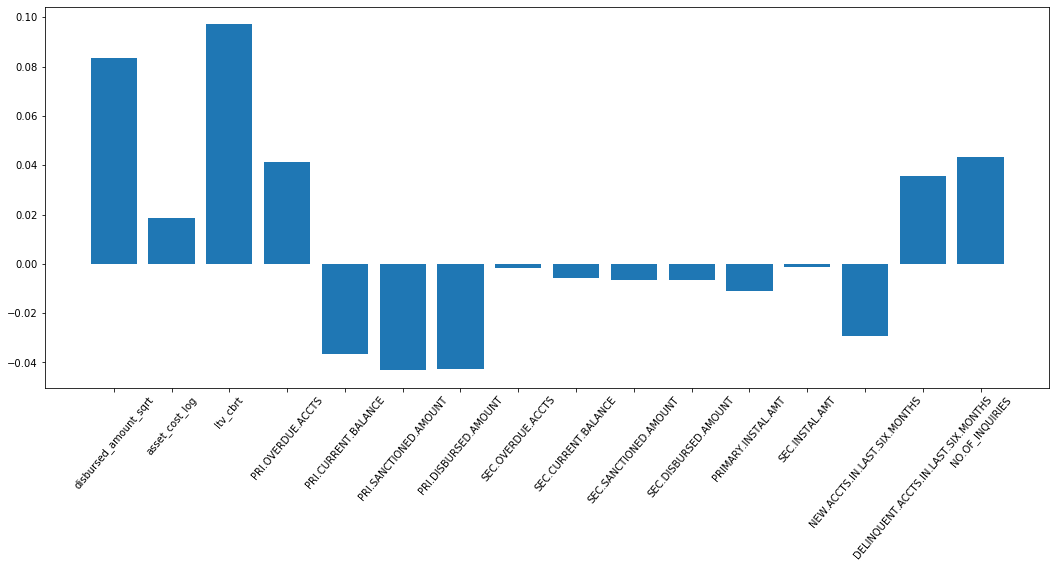

In [34]:
plt.figure(figsize=(18,7))
plt.bar(range(len(pbcs)), list(pbcs.values()), align='center')
plt.xticks(range(len(pbcs)), list(pbcs.keys()))
plt.xticks(rotation=50)

# Understanding the above values

Values for point-biserial range from -1.00 to 1.00. Values of 0.15 or higher mean that the item is performing well

In [35]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'disbursed_amount_sqrt', 'asset_cost_log', 'ltv_cbrt',
       'PRI.SANCTIONED.AMOUNT_sqrt', 'PRI

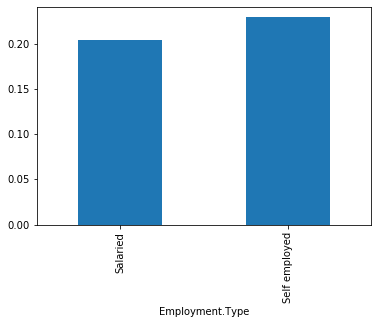

In [36]:
data.groupby('Employment.Type')['loan_default'].mean().plot('bar')

self employed people have higher chance of loan default

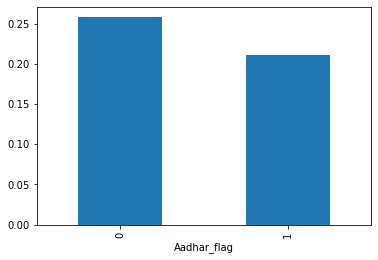

In [37]:
data.groupby('Aadhar_flag')['loan_default'].mean().plot('bar')

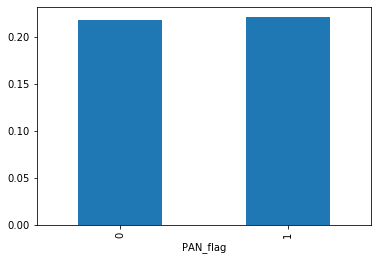

In [38]:
data.groupby('PAN_flag')['loan_default'].mean().plot('bar')

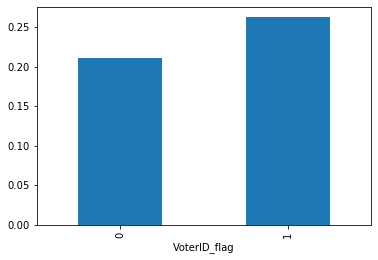

In [39]:
data.groupby('VoterID_flag')['loan_default'].mean().plot('bar')

In [40]:
data['AVERAGE.ACCT.AGE'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: AVERAGE.ACCT.AGE, dtype: object

In [41]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'disbursed_amount_sqrt', 'asset_cost_log', 'ltv_cbrt',
       'PRI.SANCTIONED.AMOUNT_sqrt', 'PRI

In [42]:
data.to_csv("new_train.csv",index=False)